## 课程论文

 请务必交到exer8文件夹下，**谢绝交到master下**
+ 请不要改动任何文件，拜托
+ 请于12月30日前先在github上提交
+ 请在元旦后提交纸质版，将本页面文件先打印为pdf格式，再去打印店付印
+ 请将论文模板和本页面文件一起装订，前者放上面，本页面文件放下面
+ 纸质版提交时间和地点请留意微信群通知

请写一下姓名和学号：
+ 姓名  易扬
+ 学号  0174922

### 样本均值分布的统计试验

+ 请将CEPS.csv数据读入python
+ 请从中随机抽取1000个数据
+ 请根据问卷从数据中挑选两个连续型变量（likert量表可以近似看作连续变量）
+ 计算这两个连续变量的均值
+ 重复随机抽取—计算均值这个过程30次，得到两个变量30个样本均值
+ 绘制这30个样本均值的直方图
+ 计算均值的均值和标准误

In [140]:
import numpy as np
import pandas as pd

In [141]:
df = pd.read_csv('CEPS.csv',encoding='gb2312')#导入数据
df.head()

E:\python\lib\site-packages\IPython\core\interactiveshell.py:2785: DtypeWarning: Columns (40,41) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


,ids,clsids,schids,ctyids,frame,subsample,sweight,fall,grade9,stcog,...,steco_3c,stonly,stsib,stsibrank,stmedu,stfedu,stprhedu,stfdrunk,stprfight,stprrel
0,1,1,1,1,3,3,218.738892,0,0,11,...,3.0,1,NaN,NaN,3.0,3.0,3.0,1.0,1.0,2.0
1,2,1,1,1,3,3,216.518234,0,0,17,...,2.0,1,NaN,NaN,8.0,5.0,8.0,1.0,1.0,2.0
2,3,1,1,1,3,3,216.518234,0,0,12,...,2.0,2,1.0,3.0,3.0,3.0,3.0,1.0,1.0,1.0
3,4,1,1,1,3,3,218.738892,0,0,10,...,2.0,1,NaN,NaN,6.0,7.0,7.0,1.0,1.0,2.0
4,5,1,1,1,3,3,217.553040,0,0,10,...,3.0,1,NaN,NaN,7.0,8.0,8.0,1.0,1.0,2.0


In [142]:
data = df.sample(n=1000,axis=0)##axis=0的时是抽取行,随机抽取1000行数据
data.head()

,ids,clsids,schids,ctyids,frame,subsample,sweight,fall,grade9,stcog,...,steco_3c,stonly,stsib,stsibrank,stmedu,stfedu,stprhedu,stfdrunk,stprfight,stprrel
14561,14562,338,87,22,1,1,3730.769287,0,1,1,...,2.0,2,2.0,3.0,2.0,6.0,6.0,1.0,1.0,2.0
16305,16306,381,98,25,1,1,1393.856567,1,1,6,...,2.0,2,2.0,2.0,3.0,3.0,3.0,1.0,1.0,2.0
2778,2779,69,18,5,3,3,173.563187,0,0,11,...,2.0,2,1.0,3.0,2.0,3.0,3.0,1.0,1.0,2.0
10828,10829,262,68,17,1,1,2330.469727,1,1,7,...,2.0,2,1.0,3.0,2.0,5.0,5.0,1.0,2.0,2.0
3467,3468,86,22,6,1,1,3048.563965,1,0,9,...,2.0,1,NaN,NaN,2.0,3.0,3.0,NaN,NaN,NaN


In [143]:
data_a=data[['b08b','b12']]##选择两个连续变量，分别是“您爸爸的工作”与“你家里书很多吗”
data_a.head()

,b08b,b12
14561,8.0,3.0
16305,5.0,1.0
2778,5.0,3.0
10828,8.0,3.0
3467,8.0,3.0


In [144]:
data_a.describe()#描述统计

,b08b,b12
count,976.000000,1000.000000
mean,5.912910,3.161000
std,2.381897,1.199382
min,1.000000,1.000000
25%,4.000000,2.000000
50%,7.000000,3.000000
75%,8.000000,4.000000
max,10.000000,5.000000


In [145]:
data_b=data_a.dropna()##清洗有空缺的数据
data_b.head()

,b08b,b12
14561,8.0,3.0
16305,5.0,1.0
2778,5.0,3.0
10828,8.0,3.0
3467,8.0,3.0


In [146]:
l1 = []
for i in range(1,31):#重复随机抽取—计算均值这个过程30次
    data = df.sample(n=1000,axis=0)
    data_c=data[['b08b','b12']]
    a=data_c.mean()
    l1.append(a)
data_d=pd.DataFrame(l1,columns=['b12','b08b'])
data_d

,b12,b08b
0,3.157789,5.796488
1,3.164329,5.786299
2,3.193970,5.704733
3,3.133938,5.630010
4,3.201403,5.703893
5,3.110553,5.771047
6,3.192578,5.817337
7,3.155779,5.686598
8,3.147590,5.646217
9,3.138833,5.708247


In [147]:
import matplotlib.pyplot as plt
import matplotlib
from matplotlib.ticker import MultipleLocator, FormatStrFormatter
plt.rcParams['font.sans-serif']=['SimHei'] #用来正常显示中文标签
plt.rcParams['axes.unicode_minus']=False #用来正常显示负号

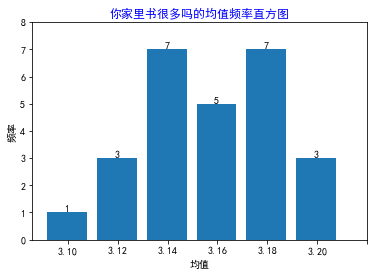

In [148]:
fig1,ax1 = plt.subplots()#绘制这30个样本1均值的直方图
a=data_d.b12
name_list = ['3.10', '3.12', '3.14', '3.16','3.18','3.20']#计算各个数值均值的频率
x1= sum(data_d.b12<3.10)
x2=sum((data_d.b12>3.10)&(data_d.b12<3.12))
x3=sum((data_d.b12>3.12) & (data_d.b12<3.14))
x4=sum((data_d.b12>3.14) & (data_d.b12<3.16))
x5=sum((data_d.b12>3.16) & (data_d.b12<3.18))
x6=sum((data_d.b12>3.18) & (data_d.b12<3.20))
num_list=[x1,x2,x3,x4,x5,x6]
rects=plt.bar(range(len(num_list)), num_list)
index=[0,1,2,3,4,5,6]
index=[int(c)+0.02 for c in index]
plt.ylim(ymax=8, ymin=0)
plt.xticks(index, name_list)
plt.ylabel("频率") 
plt.xlabel("均值")
plt.title("你家里书很多吗的均值频率直方图",loc='center',color='b')
for rect in rects:
    height = rect.get_height()
    plt.text(rect.get_x() + rect.get_width() / 2, height, str(height), ha='center', va='bottom')
plt.show()

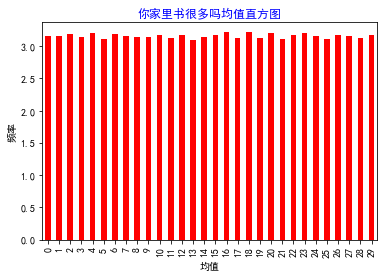

In [149]:
data_e=data_d['b12']#绘制这30个样本1均值的直方图
data_e.plot(kind='bar',color='red')
plt.ylabel("频率") 
plt.xlabel("均值")
plt.title("你家里书很多吗均值直方图",loc='center',color='b')
plt.show()

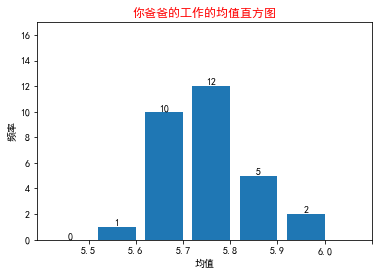

In [150]:
fig2,ax2 = plt.subplots()#绘制这30个样本2均值的直方图
a=data_d.b08b
name_list = ['5.5', '5.6', '5.7', '5.8','5.9','6.0']#计算各个数值均值的频率
x1= sum(data_d.b08b<5.5)
x2=sum((data_d.b08b>5.5)&(data_d.b08b<5.6))
x3=sum((data_d.b08b>5.6) & (data_d.b08b<5.7))
x4=sum((data_d.b08b>5.7) & (data_d.b08b<5.8))
x5=sum((data_d.b08b>5.8)&(data_d.b08b<5.9))
x6=sum((data_d.b08b>5.9)&(data_d.b08b<6))
num_list=[x1,x2,x3,x4,x5,x6]
rects=plt.bar(range(len(num_list)), num_list)
##index=[69,69.2,69.4,69.6,69.8,70,70.2,70.4,70.6]
index=[0,1,2,3,4,5,6]
index=[int(c)+0.4 for c in index]
plt.ylim(ymax=17, ymin=0)
plt.xticks(index, name_list)
plt.ylabel("频率") 
plt.xlabel("均值")
plt.title("你爸爸的工作的均值直方图",loc='center',color='r')
for rect in rects:
    height = rect.get_height()
    plt.text(rect.get_x() + rect.get_width() / 2, height, str(height), ha='center', va='bottom')
plt.show()

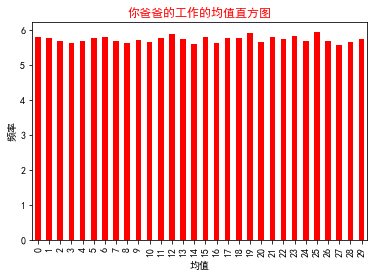

In [151]:
data_e=data_d['b08b']#绘制这30个样本2均值的直方图
data_e.plot(kind='bar',color='red')
plt.ylabel("频率") 
plt.xlabel("均值")
plt.title("你爸爸的工作的均值直方图",loc='center',color='r')
plt.show()

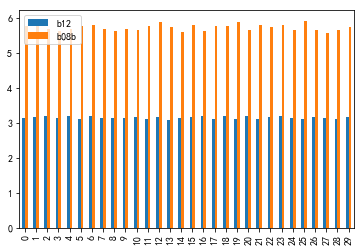

In [152]:
data_d.plot(kind='bar')##二者比较
plt.show()

In [153]:
##计算均值的均值和标准误
b08b_avg_list = data_d.b08b
b12_avg_list = data_d.b12
b08b_u = b08b_avg_list.mean()
print("b08b的最终均值",b08b_u)
b08b_std = b08b_avg_list.std(ddof=1)  #A13的无偏估计量
print("b08b的无偏标准差",b08b_std)
b12_u = b12_avg_list.mean()     #A14的无偏估计量
print("b12的最终均值",b12_u)
b12_std = b12_avg_list.std(ddof=1)
print("b12的无偏标准差",b12_std)

b08b的最终均值 5.743039407338492
b08b的无偏标准差 0.08985168938124562
b12的最终均值 3.1568527674138243
b12的无偏标准差 0.03385380093388388


### 回归分析

+ 请从CEPS.csv数据里挑选若干变量建立回归方程，要求至少三个自变量
    + 如，学生的学业成绩受认知水平、家庭收入的影响
    + 考虑因变量和自变量间的实质关系，变量间关系应该是有意义
    + 选择自变量时，注意变量的类型，如果是分类变量，需要进行编码
+ 请报告回归方程的结果，需要包括：
    + 模型拟合指标
    + 模型的显著性检验结果
    + 变量的系数
    + 各系数的显著性检验结果
    + 对模型结果的解释
    

In [73]:
%matplotlib inline
import statsmodels.api as sm
import statsmodels.formula.api as smf
import numpy as np
import pandas as pd

In [82]:
df = pd.read_csv('CEPS.csv',encoding='gb2312', na_values=data_f)#读取数据
df.head()

E:\python\lib\site-packages\IPython\core\interactiveshell.py:2785: DtypeWarning: Columns (40,41) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


,ids,clsids,schids,ctyids,frame,subsample,sweight,fall,grade9,stcog,...,steco_3c,stonly,stsib,stsibrank,stmedu,stfedu,stprhedu,stfdrunk,stprfight,stprrel
0,1,1,1,1,3,3,218.738892,0,0,11,...,3.0,1,NaN,NaN,3.0,3.0,3.0,1.0,1.0,2.0
1,2,1,1,1,3,3,216.518234,0,0,17,...,2.0,1,NaN,NaN,8.0,5.0,8.0,1.0,1.0,2.0
2,3,1,1,1,3,3,216.518234,0,0,12,...,2.0,2,1.0,3.0,3.0,3.0,3.0,1.0,1.0,1.0
3,4,1,1,1,3,3,218.738892,0,0,10,...,2.0,1,NaN,NaN,6.0,7.0,7.0,1.0,1.0,2.0
4,5,1,1,1,3,3,217.553040,0,0,10,...,3.0,1,NaN,NaN,7.0,8.0,8.0,1.0,1.0,2.0


In [75]:
#x1代表妈妈的受教育水平
#x2代表爸爸的受教育水平
#x3代表父母是否指导你的功课的频率
#x4代表父母是否检查你的作业的频率
#y代表你目前在班里的成绩处于的水平
df1=df.sample(n=1000)
T2 = pd.DataFrame({
    'x1': df1.b06,
    'x2': df1.b07,
    'x3': df1.b2202,
    'x4': df1.b2201,
    'y':  df1.c12})
T2=T2.dropna(axis=0,how='any')
T2.head()

,x1,x2,x3,x4,y
13803,2.0,3.0,2.0,2.0,3.0
3649,3.0,3.0,2.0,3.0,2.0
11764,3.0,2.0,3.0,1.0,4.0
8174,5.0,3.0,4.0,4.0,3.0
16289,2.0,3.0,1.0,2.0,4.0


In [76]:
#构建自变量和因变量
model_x= ['x1','x2','x3','x4']
x = T2.loc[ :,model_x].values
y=T2['y'].values

In [77]:
#用最小二乘法进行拟合
model = sm.OLS(y, x)  
results = model.fit()
results.params

array([0.20302448, 0.21138985, 0.19876344, 0.30382963])

In [78]:
print(results.summary())

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.815
Model:                            OLS   Adj. R-squared:                  0.814
Method:                 Least Squares   F-statistic:                     1028.
Date:                Wed, 02 Jan 2019   Prob (F-statistic):               0.00
Time:                        00:15:35   Log-Likelihood:                -1660.5
No. Observations:                 939   AIC:                             3329.
Df Residuals:                     935   BIC:                             3348.
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
x1             0.2030      0.032      6.391      0.0

In [ ]:
取 c12（目前在班里处于的成绩）做被解释变量
取 “b06(妈妈的受教育水平)” 、“b07(爸爸的受教育水平)”、“b2202（父母是否指导你的功课的频率）”、
“b2201(父母是否指导你的作业的频率)”,解释变量x1、x2、x3、x4
探究父母的受教育程度、父母指导功课或作业的频率对孩子的成绩影响的大小.

模型拟合指标:
R²=0.815，趋近1，说明模型的拟合效果较好。说明目前在班里处于的成绩由X1 X2 X3 x4解释了81.5%，拟合效果较好。

Jarque-Bera检验的P值接近于0，表明选取的数据服从正态分布。

模型的显著性：
根据F统计量 其中P值<0.01
在99%的把握下模型显著
变量系数分别为：
x1=0.2030  ，x2=  0.2114   ,x3=0.1988  ,x4=0.3038 ,对变量均呈现正相关。

模型的显著性检验结果：
Prob（Omnibus）<0.05，说明该模型的结果是显著的。

由于所选取的变量都是选项越靠后代表的程度越大的变量，likert量表可以近似看作连续变量，
所以此模型无需经过哑变量编码处理。

线性回归模型为y=0.2030x1+0.2114x2+0.1988x3+0.3038x4+e

模型解释：
X1代表代表着妈妈的受教育水平，即妈妈的受教育水平每提升一个水平（如从高中-大学本科），则你目前在班里的成绩的水平提高0.2030
X2代表每天爸爸的受教育水平，即爸爸的受教育水平每提升一个水平，则你目前在班里的成绩的水平提高0.2114
X3代表父母是否指导你的功课的频率，即父母是否指导你的功课的频率每提升一个水平，则你目前在班里的成绩的水平提高0.1988
X4代表父母是否指导你的作业的频率，即父母是否指导你的作业的频率每提升一个水平，则你目前在班里的成绩的水平提高0.3038
综上所述，提高成绩最有效的方法就是多让家长指导孩子作业。